In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car_data.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [4]:
new_df = df.copy()

In [5]:
df['name'] = new_df['name'].str.split(' ').apply(lambda x : x[0]+(f' {x[1]}' if len(x)>2 else ''))

In [6]:
new_df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [7]:
df['company'] = np.where(new_df['company'].str.isnumeric(),np.NaN,new_df['company'])

In [8]:
df['year'] = np.where(new_df['year'].str.isnumeric(),new_df['year'],np.NaN)

In [9]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       nan, '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [10]:
df['Price'] = np.where(new_df['Price'] == 'Ask For Price',np.NaN,new_df['Price'])

In [11]:
df = df.dropna()

In [12]:
df['Price'] = df['Price'].str.replace(',','').astype(int)

In [13]:
df['kms_driven'] = df['kms_driven'].str.split(' ').apply(lambda x : int(x[0].replace(',',''))) 

In [14]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [15]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport,Ford,2014,575000,36000,Diesel
6,Ford,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki,Maruti,2011,270000,50000,Petrol
885,Tata Indica,Tata,2009,110000,30000,Diesel
886,Toyota Corolla,Toyota,2009,300000,132000,Petrol
888,Tata Zest,Tata,2018,260000,27000,Diesel


In [16]:
df.reset_index(inplace=True,drop=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.4+ KB


In [18]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport,Ford,2014,575000,36000,Diesel
4,Ford,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki,Maruti,2011,270000,50000,Petrol
812,Tata Indica,Tata,2009,110000,30000,Diesel
813,Toyota Corolla,Toyota,2009,300000,132000,Petrol
814,Tata Zest,Tata,2018,260000,27000,Diesel


In [19]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816,8.160000e+02,816.000000,816
unique,115,25,21,NaN,NaN,3
top,Maruti Suzuki,Maruti,2015,NaN,NaN,Petrol
freq,221,221,111,NaN,NaN,428
mean,NaN,NaN,NaN,4.117176e+05,46275.531863,NaN
std,NaN,NaN,NaN,4.751844e+05,34297.428044,NaN
min,NaN,NaN,NaN,3.000000e+04,0.000000,NaN
25%,NaN,NaN,NaN,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,NaN,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,NaN,4.912500e+05,56818.500000,NaN


In [20]:
df=df[df['Price']<6000000]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    object
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.6+ KB


/tmp/ipykernel_15230/1135374102.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


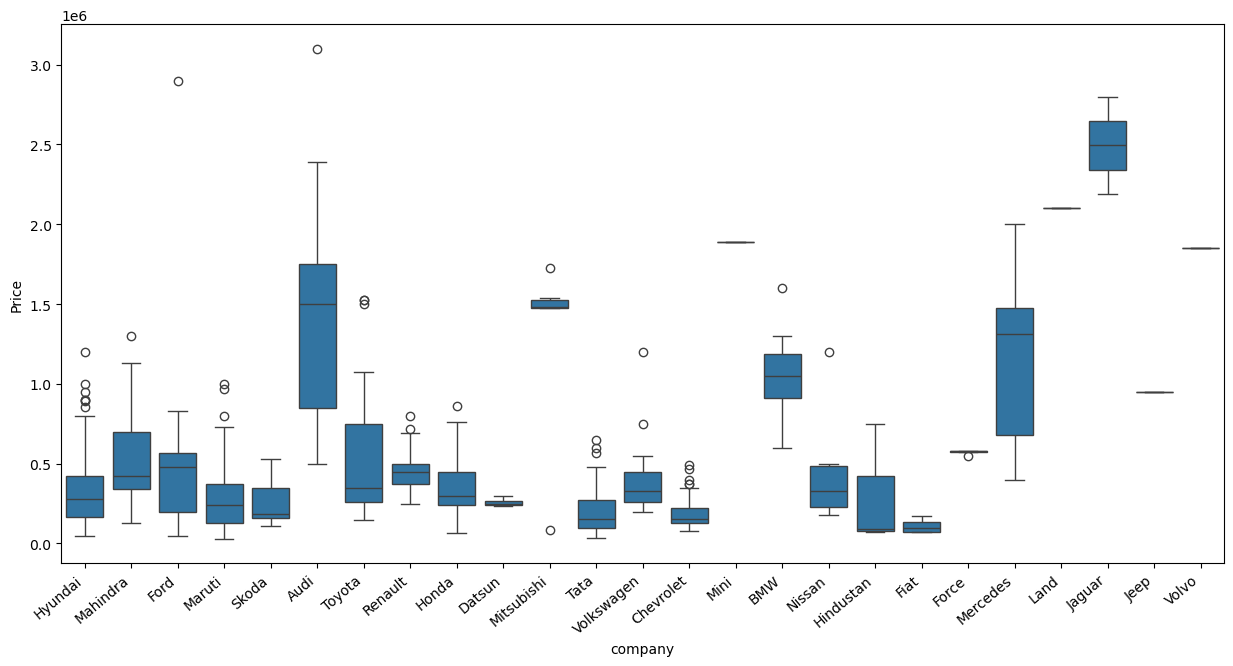

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/home/janardhan/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/janardhan/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/janardhan/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/janardhan/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/janardhan/anaconda3/lib/python3.12/site-packages/sea

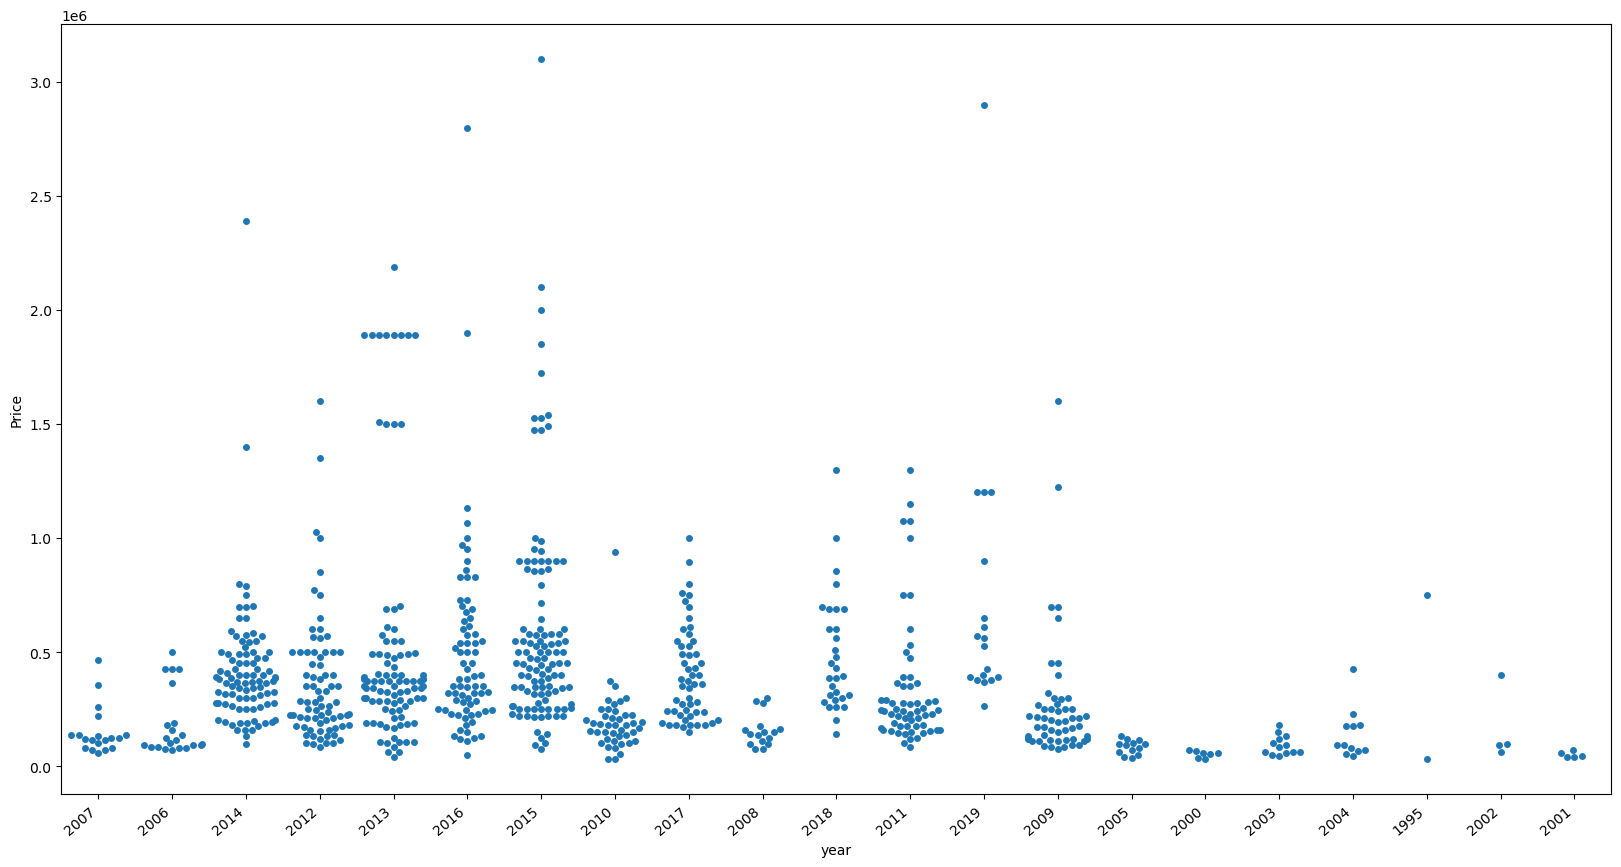

In [26]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

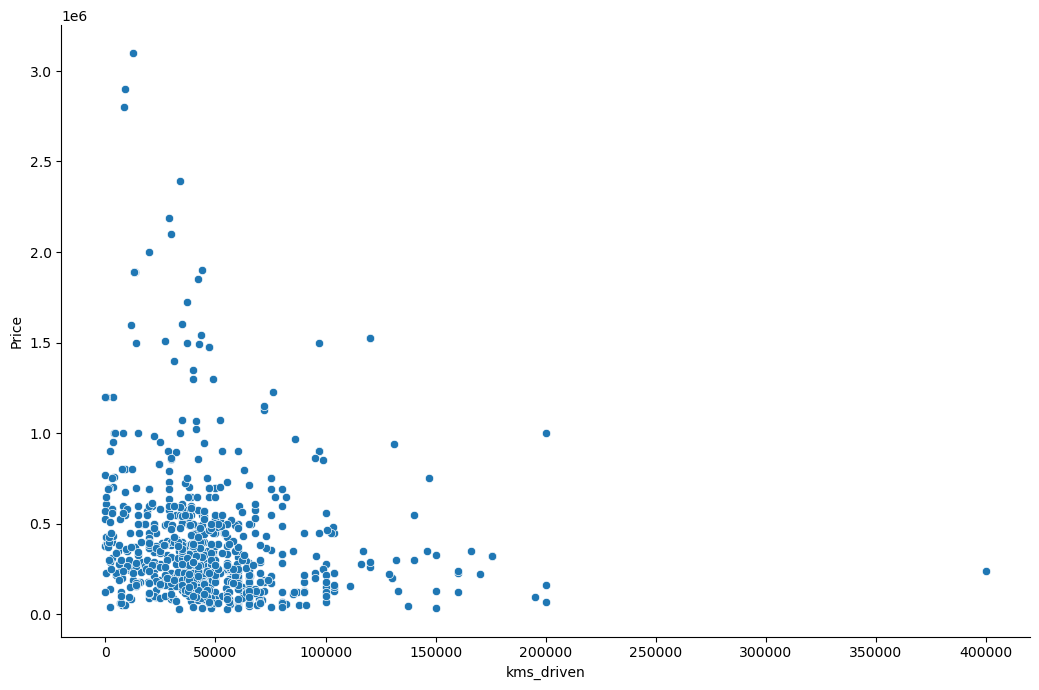

In [28]:
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

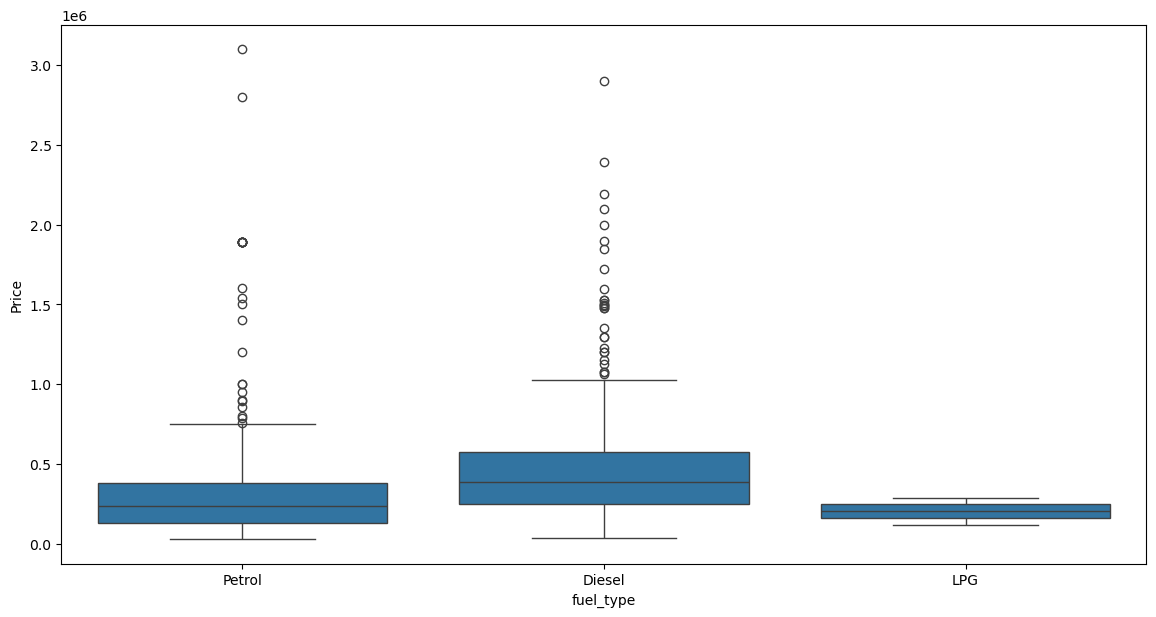

In [30]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=df)

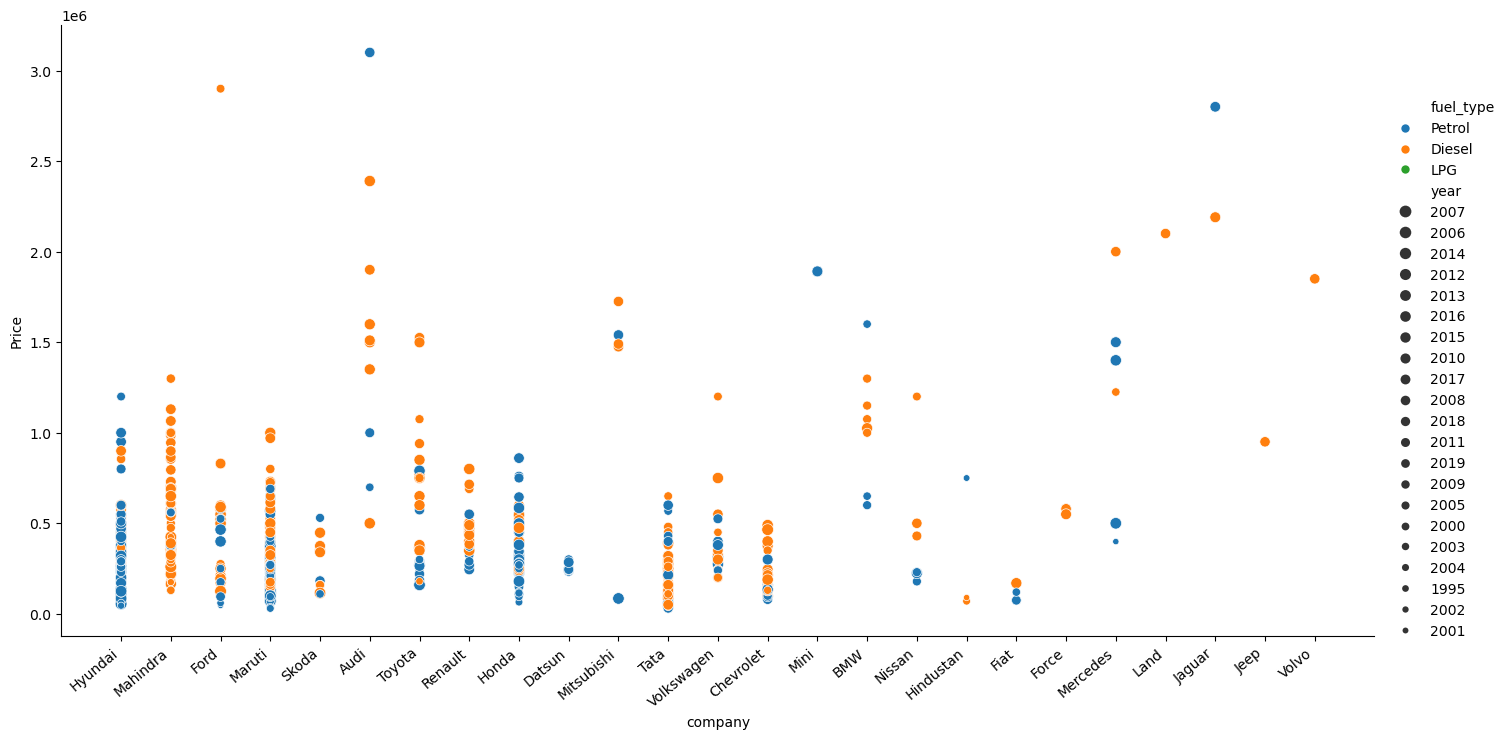

In [31]:
ax=sns.relplot(x='company',y='Price',data=df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [36]:
x=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']

In [39]:
x.shape

(815, 5)

In [40]:
y.shape

(815,)

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=686)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [80]:
ord_trf = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type'])
],remainder='passthrough')

In [81]:
pipeline = Pipeline([
    ('ord_trf',ord_trf),
    ('model',LinearRegression())
])

In [82]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories=[array(['Audi', 'Audi A3', 'Audi A4', 'Audi A6', 'Audi Q3', 'Audi Q5',
       'BMW', 'BMW 3', 'BMW 5', 'BMW 7', 'BMW X1', 'Chevrolet',
       'Chevrolet Beat', 'Chevrolet Cruze', 'Chevrolet Enjoy',
       'Chevrolet Sail', 'Chevrolet Spark', 'Chevrolet Tavera',
       'Datsun GO', 'Datsun Go', 'Dats...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('model', LinearRegression())])

In [83]:
y_pred = pipeline.predict(x_test)

In [84]:
ohe = OneHotEncoder()

In [85]:
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [86]:
ohe.categories_

[array(['Audi', 'Audi A3', 'Audi A4', 'Audi A6', 'Audi Q3', 'Audi Q5',
        'BMW', 'BMW 3', 'BMW 5', 'BMW 7', 'BMW X1', 'Chevrolet',
        'Chevrolet Beat', 'Chevrolet Cruze', 'Chevrolet Enjoy',
        'Chevrolet Sail', 'Chevrolet Spark', 'Chevrolet Tavera',
        'Datsun GO', 'Datsun Go', 'Datsun Redi', 'Fiat Linea',
        'Fiat Petra', 'Fiat Punto', 'Force Motors', 'Ford',
        'Ford EcoSport', 'Ford Endeavor', 'Ford Fiesta', 'Ford Figo',
        'Ford Fusion', 'Ford Ikon', 'Hindustan Motors', 'Honda',
        'Honda Amaze', 'Honda Brio', 'Honda City', 'Honda Jazz',
        'Honda Mobilio', 'Honda WR', 'Hyundai', 'Hyundai Accent',
        'Hyundai Creta', 'Hyundai Elantra', 'Hyundai Elite', 'Hyundai Eon',
        'Hyundai Fluidic', 'Hyundai Getz', 'Hyundai Grand',
        'Hyundai Santro', 'Hyundai Sonata', 'Hyundai Verna',
        'Hyundai Xcent', 'Hyundai i10', 'Hyundai i20', 'Jaguar XE',
        'Jaguar XF', 'Jeep Wrangler', 'Land Rover', 'Mahindra',
        'Mahindra

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8222537634203418

In [88]:
scores = []
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    pipeline = Pipeline([
        ('ord_trf',ord_trf),
        ('model',LinearRegression())
    ])
    pipeline.fit(x_train,y_train)
    y_pred = pipeline.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [89]:
np.argmax(scores)

686

In [90]:
scores[686]

0.8222537634203418

In [91]:
df.to_csv('car_data_cleaned.csv')

In [92]:
import pickle

In [94]:
with open('car_price_predictor.pkl','wb+') as f:
    pickle.dump(pipeline,f)

In [95]:
df['name'].unique()

array(['Hyundai Santro', 'Mahindra Jeep', 'Hyundai Grand',
       'Ford EcoSport', 'Ford', 'Hyundai', 'Maruti Suzuki', 'Skoda Fabia',
       'Hyundai Elite', 'Mahindra Scorpio', 'Audi', 'Hyundai i20',
       'Mahindra Bolero', 'Toyota Innova', 'Renault Lodgy', 'Skoda Yeti',
       'Renault Duster', 'Honda City', 'Honda', 'Honda Amaze',
       'Datsun Redi', 'Mitsubishi Pajero', 'Tata Indigo',
       'Volkswagen Polo', 'Chevrolet Spark', 'Mini Cooper', 'Renault',
       'Mahindra Quanto', 'Volkswagen Vento', 'Toyota Corolla',
       'Hyundai Verna', 'BMW 3', 'Toyota Etios', 'Ford Figo',
       'Chevrolet Beat', 'BMW 7', 'Mahindra XUV500', 'Hyundai i10',
       'Chevrolet', 'Nissan Micra', 'Tata Indica', 'Hindustan Motors',
       'Volkswagen Jetta', 'Volkswagen', 'Mahindra', 'Nissan',
       'Fiat Punto', 'Hyundai Eon', 'Hyundai Fluidic', 'Fiat Petra',
       'Hyundai Creta', 'Tata Nano', 'Tata Sumo', 'Volkswagen Passat',
       'Renault Scala', 'Mahindra Xylo', 'Force Motors', 'Toyota'

In [96]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)